# Gathering the data

In [1]:
#All important packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the CSV file
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
doggo_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True )

deleted_tweets = []

with open(os.path.join(os.getcwd(), 'tweet_json.txt'), mode = 'w') as file:
    for twt_id in tweet_archive['tweet_id']:
        try:
            tweet = api.get_status(twt_id, tweet_mode = 'extended')
            file.write(json.dumps(tweet._json) + '\n')
        except:
            print('Oops! couldn\'t find the tweet!')
            deleted_tweets.append(twt_id)
       
#When loop finishes, we set up the program to let us know.        
print("Finished retrieving tweets!")


Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Rate limit reached. Sleeping for: 737
Oops! couldn't find the tweet!
Oops! couldn't find the tweet!
Rate limit reached. Sleeping for: 736
Finished retrieving tweets!


In [6]:
t_id = []
t_fc = []
t_rtc = []
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            t_id.append(tweet_data['id'])
            t_fc.append(tweet_data['favorite_count'])
            t_rtc.append(tweet_data['retweet_count'])
            
doggo_data = pd.DataFrame({'tweet_id':t_id, 'favorite_count':t_fc, 'retweet_count':t_rtc})

Now that we have data loaded in a JSON file, we will start the process of :

# assessing the data.

In [7]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1240,712085617388212225,NaN,NaN,2016-03-22 01:16:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Olive and Ruby. They are best bud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712085617...,11,10,Olive,None,None,None,None
1525,690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690400367...,10,10,Eriq,None,None,None,None
1223,714251586676113411,NaN,NaN,2016-03-28 00:43:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He hates potted plants. 8/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714251586...,8,10,Thumas,None,None,None,None
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He pouts until he gets to go ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,None,None,None,None
1767,678396796259975168,NaN,NaN,2015-12-20 02:09:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These little fellas have opposite facial expre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678396796...,12,10,None,None,None,None,None


In [10]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
print(tweet_archive[tweet_archive.tweet_id.isnull()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [12]:
print(tweet_archive[tweet_archive.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [13]:
print(tweet_archive[tweet_archive.rating_numerator == 0])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator 

In [14]:
print(tweet_archive.name.value_counts())

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
Buddy          7
Toby           7
an             7
Daisy          7
Dave           6
Rusty          6
Koda           6
Leo            6
Bella          6
Milo           6
Stanley        6
Oscar          6
Jack           6
Jax            6
Scout          6
Phil           5
            ... 
Oreo           1
Batdog         1
Genevieve      1
Gòrdón         1
Dook           1
Juckson        1
Kathmandu      1
Shikha         1
Tripp          1
Rumpole        1
Taz            1
Jonah          1
Randall        1
Tango          1
his            1
Tom            1
Hamrick        1
Acro           1
Lillie         1
Lupe           1
Aubie          1
Caryl          1
Tycho          1
Ralphé         1
Bradlay        1
Aja            1
Sparky         1
Bonaparte     

Now, we will assess data from the doggo_df data

In [15]:
doggo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
doggo_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
doggo_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Now, we will assess data from doggo_data

In [18]:
doggo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [19]:
doggo_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37728,8220
1,892177421306343426,32390,6077
2,891815181378084864,24394,4021
3,891689557279858688,41042,8375
4,891327558926688256,39233,9080


In [20]:
doggo_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,7885.966225,2898.444207
std,6.828729e+16,12221.413519,4887.599904
min,6.660209e+17,0.000000,1.000000
25%,6.783378e+17,1366.000000,582.500000
50%,7.186133e+17,3432.000000,1353.000000
75%,7.986907e+17,9656.000000,3378.500000
max,8.924206e+17,162777.000000,82849.000000


## Issues with the Data

### Data Tidiness

1. The columns doggo, pupper, puppo, and floofer are variations of an entity so they all can be merged.
2. For a better result, all the three dataframes should become a single dataframe.


### Data Quality

1. In many dataframes, there's issue of wrong datatype.
    In tweet_archive, we have issues with tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and timestamp.    
    In doggo_df the issue is with tweet_id.
    In doggo_data the isssue is with tweet_id.
    
2. There are issues with dog's name. There are words like a, an the. These are invalid names and have to be removed.
3. Missing image data of breed predictions
4. We don't need reweets as they don't have original ratings. So, will remove them.
5. There are a few tweets that have been deleted.
6. Drop rows that do not have a jpg_url column as tweets without a jpg_url do not contain images.





# Data Cleaning




First, we need to create copies of the dataframes so that we don't spoil the data.

In [29]:
tweet_archive_c = tweet_archive.copy()
doggo_df_c = doggo_df.copy()
doggo_data_c = doggo_data.copy()

#### Cleaning for tidiness



1. Combine the doggo, pupper, puppo, and floofer columns into one column using melt.

In [30]:
#TO create list of originals IDs.
tweet_ids = tweet_archive_c.tweet_id.tolist()

#Melting the columns
tweet_archive_c =pd.melt(tweet_archive_c, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                       'retweeted_status_user_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
                                       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
        var_name = 'type_toberemoved', value_name = 'type')
tweet_archive_c = tweet_archive_c.drop('type_toberemoved', axis =1)


In [31]:
print(tweet_archive_c.tweet_id.value_counts())
print(len(tweet_archive_c))

749075273010798592    4
747219827526344708    4
676975532580409345    4
682393905736888321    4
832032802820481025    4
689993469801164801    4
699088579889332224    4
782598640137187329    4
748346686624440324    4
700847567345688576    4
669216679721873412    4
827933404142436356    4
796759840936919040    4
793241302385262592    4
805520635690676224    4
671362598324076544    4
791780927877898241    4
695816827381944320    4
754011816964026368    4
683449695444799489    4
715696743237730304    4
685315239903100929    4
842765311967449089    4
743510151680958465    4
738883359779196928    4
780858289093574656    4
699775878809702401    4
741099773336379392    4
686035780142297088    4
676237365392908289    4
                     ..
689143371370250240    4
687841446767013888    4
730924654643314689    4
882762694511734784    4
848212111729840128    4
670811965569282048    4
741743634094141440    4
892420643555336193    4
855459453768019968    4
670303360680108032    4
8291415284005560

In [32]:
for idx, twtid in enumerate(tweet_ids):
    dog_tweets = tweet_archive_c[tweet_archive_c.tweet_id == twtid]
    
    
#if a tweet has any type value(s) that is not 'None', we will, set the first one to whatever value(s) it is
# and drop the other three rows.
    if dog_tweets.type.values.tolist()[0] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_c.loc[idx, 'type'] = ','.join(doge_type)
    
        tweet_archive_c = tweet_archive_c.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[1] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_c.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_c = tweet_archive_c.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[2] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_c.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_c = tweet_archive_c.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[3] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_c.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_c = tweet_archive_c.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
#if a tweet has type value 'None' for all four types, we will just drop the last three rows
    else: 
        tweet_archive_c = tweet_archive_c.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)

2. Merging data frames

In [34]:
tweet_archive_c = pd.merge(tweet_archive_c, doggo_df_c, on = ['tweet_id'], how = 'inner')

In [35]:
tweet_archive_c = pd.merge(tweet_archive_c, doggo_data_c, on ='tweet_id', how = 'inner')

In [36]:
tweet_archive_c.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2.066000e+03,2.300000e+01,2.300000e+01,7.500000e+01,7.500000e+01,2066.000000,2066.000000,2066.000000,2066.000000,2.066000e+03,2.066000e+03,2066.000000,2066.000000
mean,7.380806e+17,6.978112e+17,4.196984e+09,7.628386e+17,1.049949e+16,12.263795,10.513553,1.203291,0.594568,1.346716e-01,6.034151e-02,8330.878993,2772.196031
std,6.763392e+16,4.359384e+16,0.000000e+00,5.813066e+16,9.092825e+16,40.768770,7.192615,0.562172,0.271062,1.007233e-01,5.094272e-02,12559.432330,4829.572073
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.764332e+17,6.732411e+17,4.196984e+09,7.118465e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364254,5.387868e-02,1.621080e-02,1586.750000,590.000000
50%,7.117137e+17,6.757073e+17,4.196984e+09,7.761133e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588030,1.184015e-01,4.939645e-02,3664.500000,1304.500000
75%,7.931317e+17,7.031489e+17,4.196984e+09,7.981456e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843883,1.955693e-01,9.208967e-02,10407.750000,3198.500000
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,162777.000000,82849.000000


In [37]:
tweet_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 27 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
type                          2066 non-null object
jpg_url                       2066 non-null object
img_num                       2066 non-null int64
p1                            2066 non-null object
p1_conf                       2066 n

#### Cleaning for Quality
##### Define
1. Fixing wrong datatypes
Since, we have merged the three dataframes, we can now eaily fix the issue of wrong datatype. 

###### Code

In [38]:
#Convert tweet_id to string
tweet_archive_c.tweet_id = tweet_archive_c.tweet_id.astype('str')


In [39]:
#convert timestamp to datetime
tweet_archive_c.timestamp = pd.to_datetime(tweet_archive_c.timestamp)

###### Test

In [40]:
#checking for change
tweet_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 27 columns):
tweet_id                      2066 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
timestamp                     2066 non-null datetime64[ns]
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
type                          2066 non-null object
jpg_url                       2066 non-null object
img_num                       2066 non-null int64
p1                            2066 non-null object
p1_conf                    

###### Define

2. Resolving the issues with dog's name.


  There are words like a, an the in Dog's name column. These are invalid names and have to be removed.

###### Code

In [41]:
tweet_archive_c.name.value_counts()


None        575
a            55
Tucker       10
Penny        10
Lucy         10
Charlie      10
Cooper       10
Oliver       10
Winston       8
Bo            8
Sadie         8
Lola          8
an            7
Daisy         7
the           7
Toby          7
Milo          6
Jax           6
Koda          6
Stanley       6
Bailey        6
Rusty         6
Scout         6
Dave          6
Bella         6
Chester       5
Buddy         5
Oscar         5
Leo           5
Alfie         5
           ... 
this          1
Scott         1
Noah          1
Oreo          1
Batdog        1
Timofy        1
actually      1
Sparky        1
his           1
Miley         1
Andy          1
Fwed          1
Tupawc        1
Shikha        1
Rumpole       1
Jonah         1
Randall       1
Tango         1
Tom           1
Aja           1
Hamrick       1
Acro          1
Tripp         1
Lillie        1
Aubie         1
Caryl         1
Tycho         1
Ralphé        1
Bradlay       1
Willem        1
Name: name, Length: 935,

It can be seen that there are names like a,an etc. and a total of 575 none values. This can be resolved by first finding the names of the dogs which do not start with capital letters & with emply name and moving them to None.

In [42]:
names_error = []
for idx, name in enumerate(tweet_archive_c.name):
     if name.islower() or name == 'None':
        j = re.compile('(?:named\s|name\sis\s)(\w+)')
        if j.findall(tweet_archive_c.loc[idx,'text']):
            tweet_archive_c.loc[idx,'name'] = j.findall(tweet_archive_c.loc[idx,'text'])[0]        
        else:
            tweet_archive_c.loc[idx,'name'] = 'None'


###### Test

In [43]:
tweet_archive_c.name.value_counts()

None       645
Lucy        10
Oliver      10
Cooper      10
Charlie     10
Penny       10
Tucker      10
Winston      8
Sadie        8
Lola         8
Bo           8
Toby         7
Daisy        7
Jax          6
Stanley      6
Bailey       6
Rusty        6
Koda         6
Dave         6
Bella        6
Scout        6
Milo         6
Leo          5
Louis        5
Alfie        5
Zoey         5
Oscar        5
Chester      5
Buddy        5
Larry        5
          ... 
Clybe        1
Kip          1
Scott        1
Noah         1
Oreo         1
Sparky       1
Aja          1
Bradlay      1
Pepe         1
Miley        1
Andy         1
Fwed         1
Tupawc       1
Shikha       1
Rumpole      1
Jonah        1
Randall      1
Tango        1
Mike         1
Guss         1
Tom          1
Hamrick      1
Acro         1
Tripp        1
Lillie       1
Shaggy       1
Caryl        1
Tycho        1
Ralphé       1
Hemry        1
Name: name, Length: 936, dtype: int64

The names with none have increased. That means we have moved no names and none capital dog names to none.

###### Define

3. Missing images to predict breed.
Since, we need images to predict the breed of the dog. We will drop all the rows which don't have an image.

###### Code

In [44]:
tweet_archive_c=tweet_archive_c[~tweet_archive_c.jpg_url.isnull()]


###### Define
4. We don't need reweets and related data.

###### Code

In [45]:
#dropping reply tweet
tweet_archive_clean = tweet_archive_c[tweet_archive_c.in_reply_to_status_id.isnull()]

#dropping retweeted tweets
tweet_archive_c = tweet_archive_c[tweet_archive_c.retweeted_status_id.isnull()]

#dropping columns related to tweets that were retweeted or reply tweets
tweet_archive_c = tweet_archive_c.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1 )

###### Test

In [46]:
#Storing the new cleaned data
tweet_archive_c.to_csv('twitter_archive_master.csv', index = False)

###### Define

5. There are a few tweets that have been deleted.

As we have removed deleted tweets, So, we need to ensure that tweets from our deleted_tweets don't come in our dataframe.

#### This cell will return an error if you get the api data from the text file, as opposed to accessing the API and then saving the text file.



###### Code

In [47]:
for tweet in deleted_tweets:
    if str(tweet) in tweet_archive_clean:
        print("Oops! Something went wrong.")
print('Done!')

Done!


###### Test
As seen, the code is not throwing an error.

###### Define

6. Drop rows that do not have a jpg_url column as tweets without a jpg_url do not contain images.
##### This clears up our issue with missing data for the doggo predictions dataframe. Tweets without predictions do not have images

###### Code

In [48]:
tweet_archive_clean=tweet_archive_clean[~tweet_archive_clean.jpg_url.isnull()]

###### Test

In [49]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2065
Data columns (total 27 columns):
tweet_id                      2043 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
timestamp                     2043 non-null datetime64[ns]
source                        2043 non-null object
text                          2043 non-null object
retweeted_status_timestamp    75 non-null object
expanded_urls                 2043 non-null object
rating_numerator              2043 non-null int64
rating_denominator            2043 non-null int64
name                          2043 non-null object
type                          2043 non-null object
jpg_url                       2043 non-null object
img_num                       2043 non-null int64
p1                            2043 non-null object
p1_conf                      

# Analyzing and Visualizing

In [50]:
tweet_archive_c.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03,1991.000000,1991.000000
mean,12.281768,10.532898,1.202913,0.593546,1.344798e-01,6.030671e-02,8644.699146,2622.810146
std,41.528951,7.326197,0.560878,0.271878,1.006249e-01,5.089760e-02,12687.397149,4681.319519
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,77.000000,11.000000
25%,10.000000,10.000000,1.000000,0.362715,5.409535e-02,1.622240e-02,1857.000000,586.000000
50%,11.000000,10.000000,1.000000,0.587372,1.175080e-01,4.952370e-02,3915.000000,1258.000000
75%,12.000000,10.000000,1.000000,0.844583,1.950575e-01,9.164355e-02,10770.500000,2994.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,162777.000000,82849.000000


In [51]:
tweet_archive_c.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37728,8220
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32390,6077
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24394,4021
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41042,8375
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39233,9080


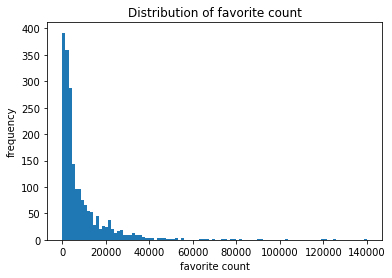

In [52]:
#Distribution of Favourites counts

bin_boundaries = np.linspace(0,140000, 101)
plt.hist(tweet_archive_c.favorite_count, bins=bin_boundaries)
plt.xlabel('favorite count')
plt.ylabel('frequency')
plt.title('Distribution of favorite count');

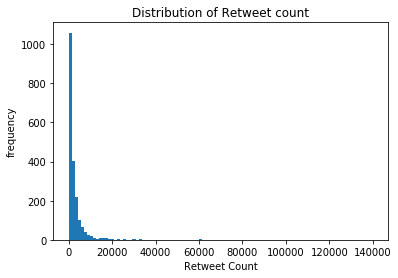

In [53]:
#Dsitribution of Retweet Counts

bin_boundaries = np.linspace(0,140000, 101)
plt.hist(tweet_archive_c.retweet_count, bins=bin_boundaries)
plt.xlabel('Retweet Count')
plt.ylabel('frequency')
plt.title('Distribution of Retweet count');

Since both the Retweet Counts and Favorite Counts are heavily skewed, we will have to use log transformations on the data.

In [54]:
to_log = ['favorite_count']
df_logged = tweet_archive_c[to_log].applymap(lambda x: np.log10(x))

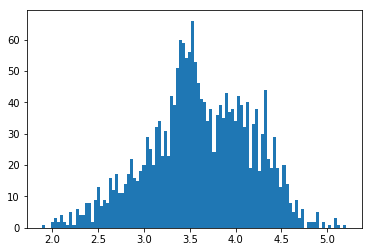

In [55]:
plt.hist(x = df_logged.favorite_count, bins = 100)
plt.show()

It can be observed that log transformation of favorite count is normally distributed.

In [56]:
to_log = ['retweet_count']
df_loggedr = tweet_archive_c[to_log].applymap(lambda x: np.log10(x))

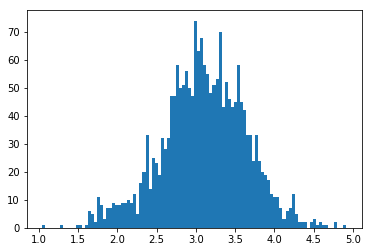

In [57]:
plt.hist(x = df_loggedr.retweet_count, bins = 100)
plt.show()

It can be observed that log transformation of retweet count is normally distributed.


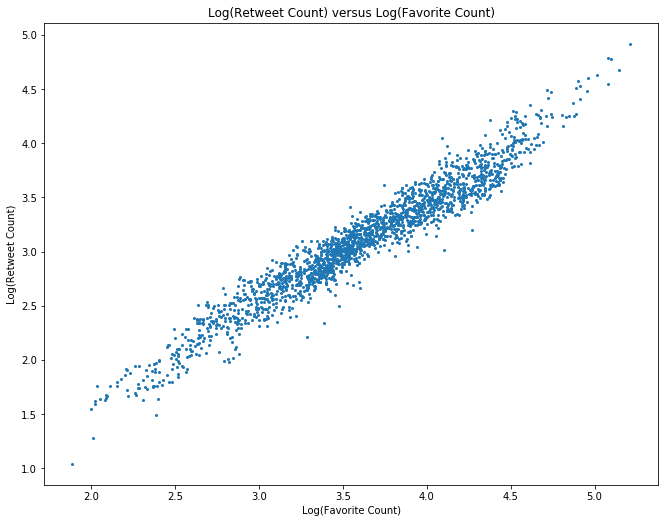

0.96789460585285692

In [58]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.favorite_count, df_loggedr.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.show()
np.corrcoef(df_loggedr.retweet_count, df_logged.favorite_count)[0][1]




This shows that retweet count and favorite count have a very strong direct relationship.


##### Distribution of rating numerator

In [59]:
tweet_archive_c.rating_numerator.describe()

count    1991.000000
mean       12.281768
std        41.528951
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Text(0.5,1,'Distribution of rating_numerator')

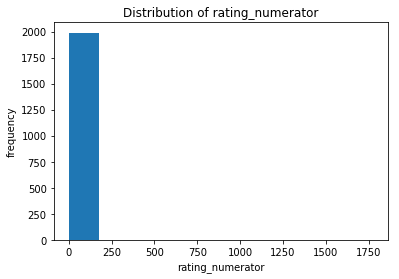

In [60]:
plt.hist(tweet_archive_c.rating_numerator)
plt.xlabel('rating_numerator')
plt.ylabel('frequency')
plt.title('Distribution of rating_numerator')

In [61]:
# Since the above graph doesn;t express much,
rating_counts = tweet_archive_c.groupby(['rating_numerator']).count()['tweet_id']
rating_counts

rating_numerator
0         2
1         5
2         9
3        19
4        16
5        33
6        32
7        52
8        95
9       151
10      418
11      396
12      449
13      260
14       35
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: tweet_id, dtype: int64

Since, we failed to plot a graph with that vivid rating numerator, we can observe that the ratings till 14 has more than one values. SO we wiil plot a graph with ratings from 0 to 14.

In [62]:
tweet_archive_c.rating_numerator = tweet_archive_c.rating_numerator.astype('float')


In [63]:
tweet_archive_c_integer_ratings_14 = tweet_archive_c[(tweet_archive_c.rating_numerator <= 14) & (tweet_archive_c.rating_numerator.apply(float.is_integer))]


In [64]:
subset_df = tweet_archive_c_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

subset_df

rating_numerator
0.0       2
1.0       5
2.0       9
3.0      19
4.0      16
5.0      33
6.0      32
7.0      52
8.0      95
9.0     151
10.0    418
11.0    396
12.0    449
13.0    260
14.0     35
Name: tweet_id, dtype: int64

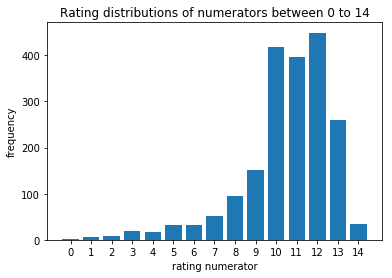

In [65]:
plt.bar(np.arange(15), subset_df)
plt.xticks(np.arange(15))
plt.xlabel('rating numerator')
plt.ylabel('frequency')
plt.title('Rating distributions of numerators between 0 to 14');

This distribution shows that most of the pics related rating between 10 to 12. With 12 being the most rated value.

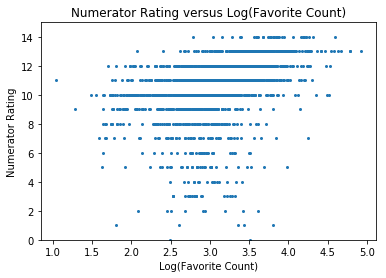

In [66]:
plt.plot(df_loggedr.retweet_count, tweet_archive_c.rating_numerator, marker ='o', linestyle='', ms= 2)
plt.title('Numerator Rating versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Numerator Rating')
plt.ylim(0,15)
plt.show()

This shows that pics with better ratings receive better retweets.

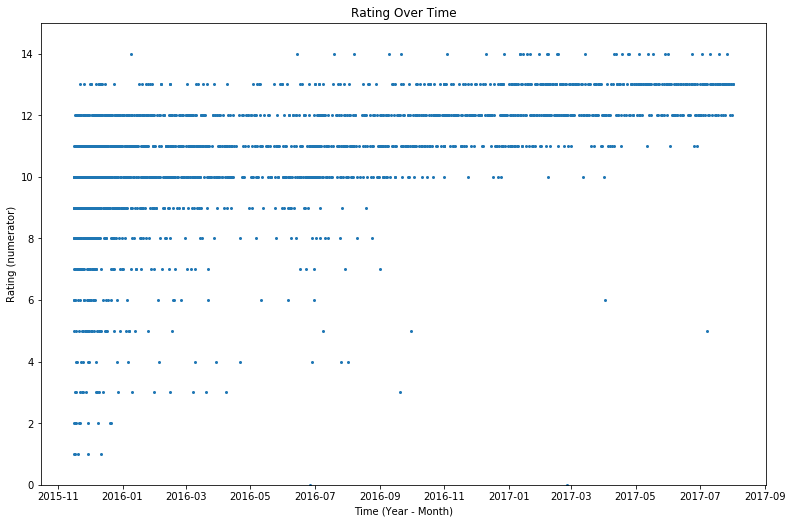

In [67]:
plt.figure(1, figsize = (13, 8.5))
plt.plot(tweet_archive_c.timestamp, tweet_archive_c.rating_numerator, marker='o', linestyle='', ms = 2)
plt.ylim(0,15)
plt.title('Rating Over Time')
plt.ylabel('Rating (numerator)')
plt.xlabel('Time (Year - Month)')
plt.show()

This shows pics with better rating keep receiving ratings over time.

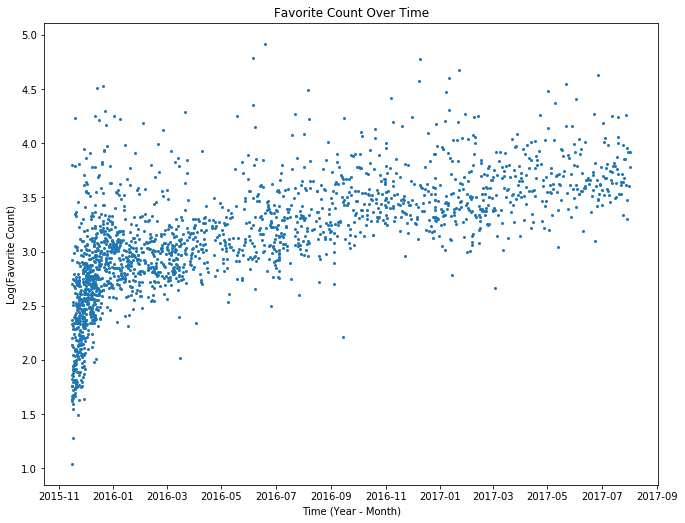

In [68]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(tweet_archive_c.timestamp ,df_loggedr.retweet_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite Count Over Time')
plt.xlabel('Time (Year - Month)')
plt.ylabel('Log(Favorite Count)')
plt.show()

The above plot shows that this account was quite popular at the beginning but slowly started to fade away.